# Aufgabe 1
Modifizieren Sie die in der Vorlesung vorgestellten Sortieralgorithmen wie folgt:
1. Drehen Sie die Reihenfolge bei InsertionSort: Statt uber das Maximum einzusortieren, ¨
soll uber das Minimum einsortiert werden. ¨
2. Lassen Sie bei BubbleSort das Maximum nach hinten wandern, statt das Minimum
nach vorne wandern zu lassen.
3. Setzen Sie bei SelectionSort anstelle des Minimums jeweils das Maximum an die richtige
Stelle.
4. W¨ahlen Sie bei QuickSort als Pivot-Element ein zuf¨alliges Element.
Erl¨autern Sie jeweils Laufzeit und Korrektheit Ihrer Algorithmen.

In [38]:
import numba as nb
import numpy as np
import random 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# define plt size
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
def new_X():
    """create new random X to be sorted and plot it"""
    global X
    X = np.random.randint(100, size=50)

    sns.barplot(X) 

## 1
### normal insertion sort

<AxesSubplot:>

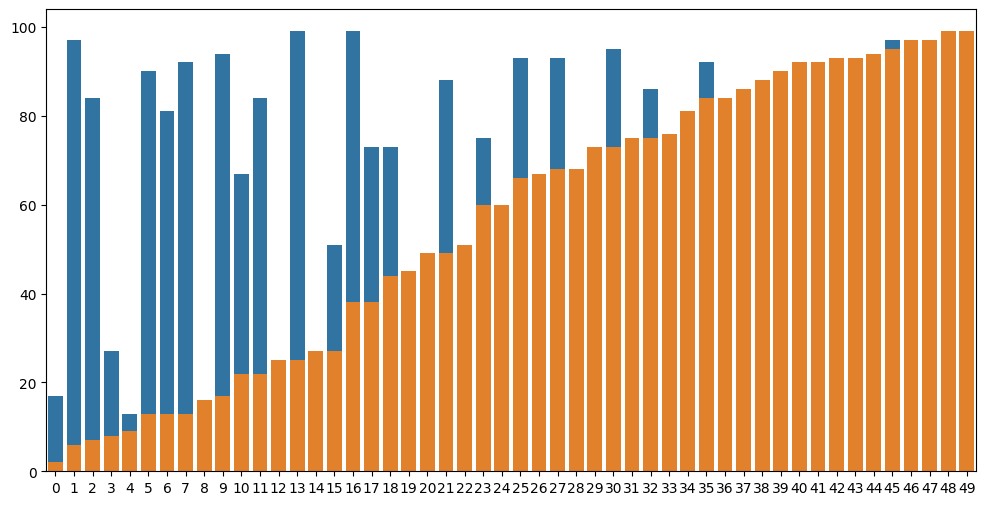

In [17]:
new_X()

def insertion_sort(X):
    for i in range(1, len(X)):
        j = int(i)

        while j > 0 and X[j - 1] > X[j]:
            X[j], X[j - 1] = X[j - 1], X[j]
            j = j - 1
        
    return X
    
sns.barplot(insertion_sort(X))

### modified

<AxesSubplot:>

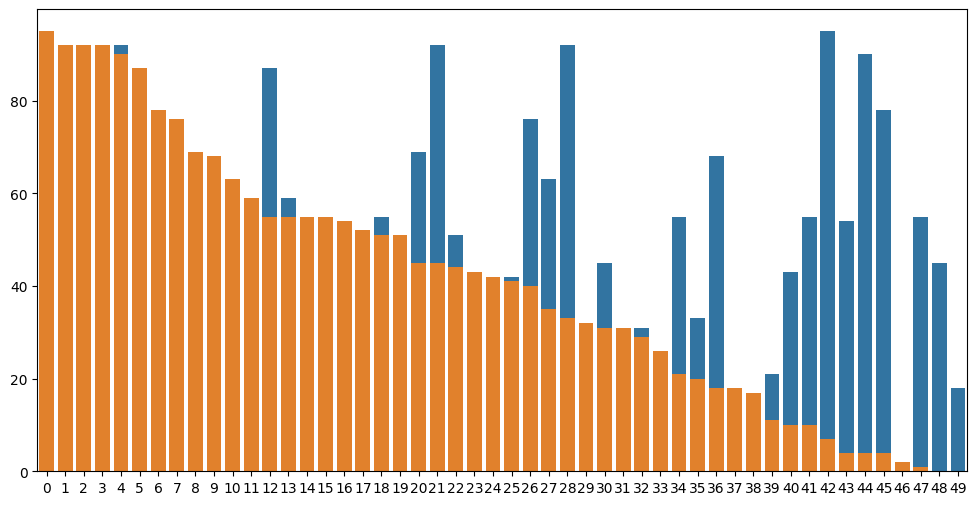

In [18]:
new_X()

def insertion_sort(X):
    for i in range(1, len(X)):
        j = int(i)

        while j > 0 and X[j - 1] < X[j]:
            X[j], X[j - 1] = X[j - 1], X[j]
            j = j - 1
        
    return X
    
sns.barplot(insertion_sort(X))

## 2
### bubble sort

<AxesSubplot:>

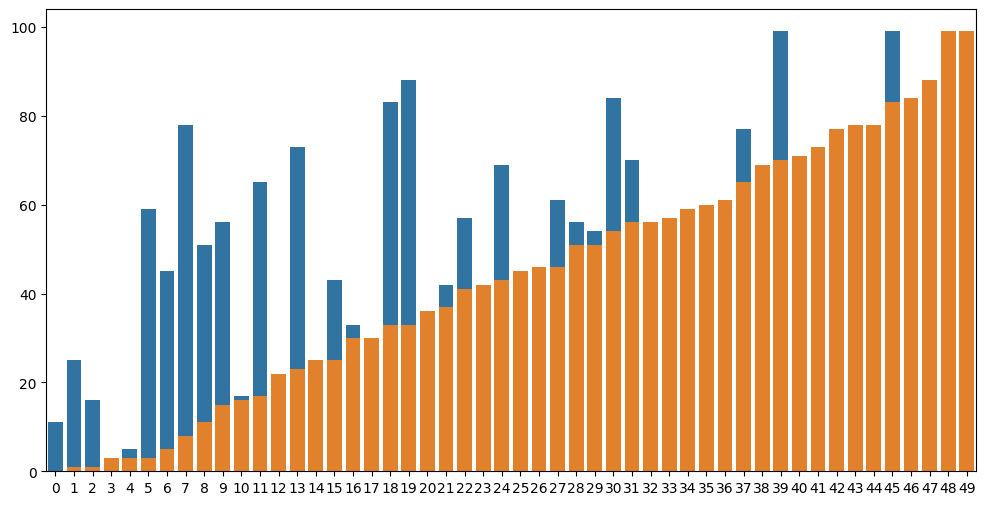

In [24]:
new_X()

def bubble_sort(X):
    for i in range(len(X)):
        for j in range(len(X) - 2, i - 1, -1):
            if X[j] > X[j + 1]:
                X[j], X[j + 1] = X[j+1], X[j]
                
    return X

sns.barplot(bubble_sort(X))

### modified

<AxesSubplot:>

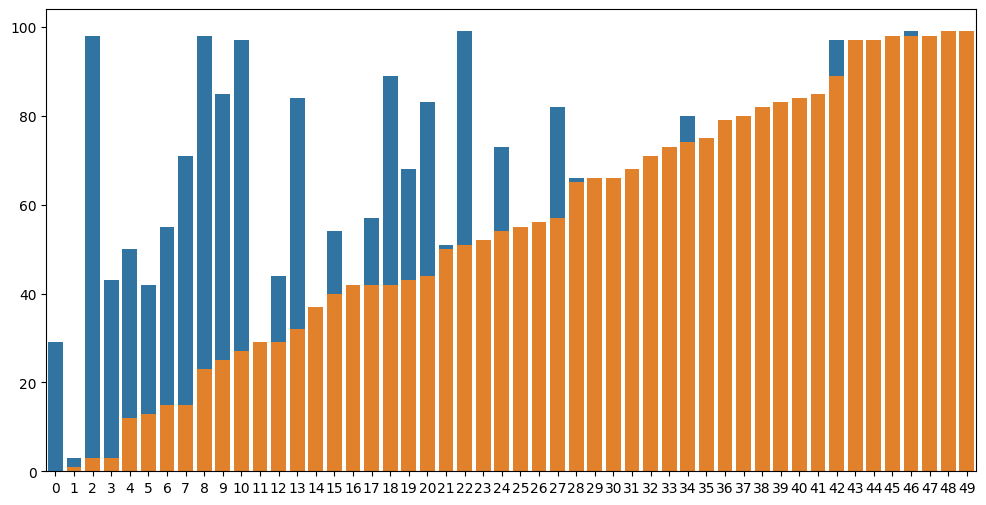

In [26]:
new_X()

def bubble_sort(X):
    for i in range(1, len(X)):
        for j in range(0, i):
            if X[j] > X[i]:
                X[i], X[j] = X[j], X[i]
                
    return X

sns.barplot(bubble_sort(X))

## 3
### selection sort

<AxesSubplot:>

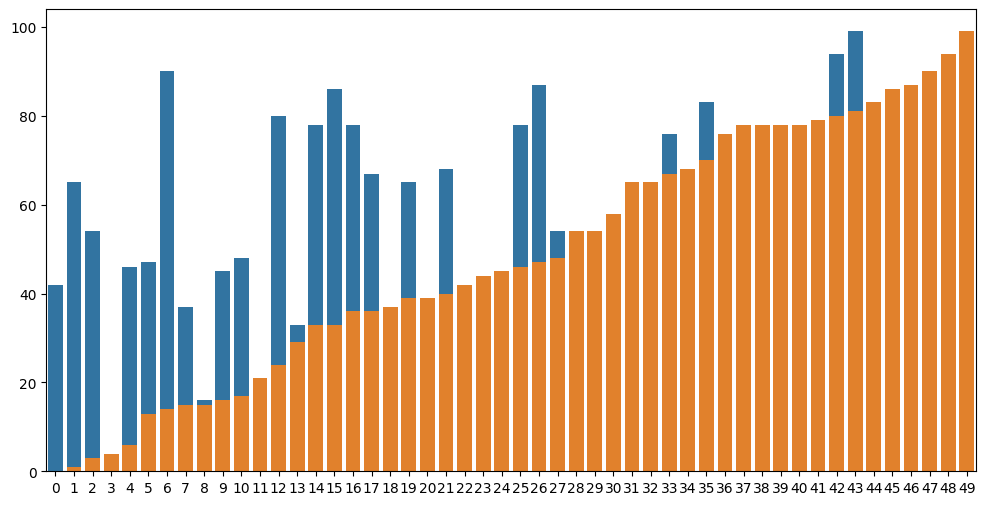

In [29]:
new_X()

def selection_sort(X):
    for i in range(len(X)):
        min_index = i
        
        for j in range(i, len(X)):
            if X[j] < X[min_index]:
                min_index = j
                
        X[i], X[min_index] = X[min_index], X[i]
        
    return X

sns.barplot(selection_sort(X))

### modified

<AxesSubplot:>

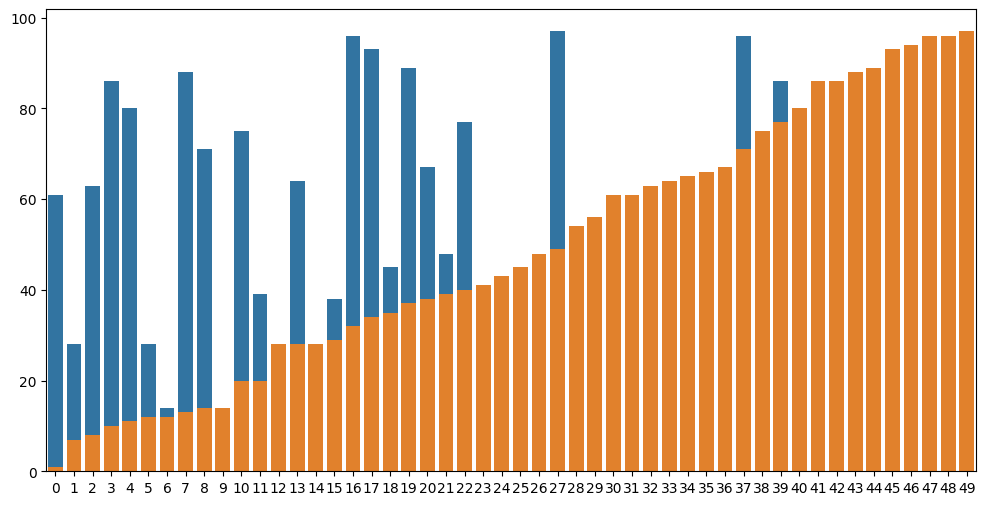

In [36]:
new_X()

def selection_sort(X):
    for i in range(len(X)-1, -1, -1):
        max_index = i
        
        for j in range(i, -1, -1):
            if X[j] > X[max_index]:
                max_index = j
                
        X[i], X[max_index] = X[max_index], X[i]
        
    return X

sns.barplot(selection_sort(X))

## 4
### quicksort

<AxesSubplot:>

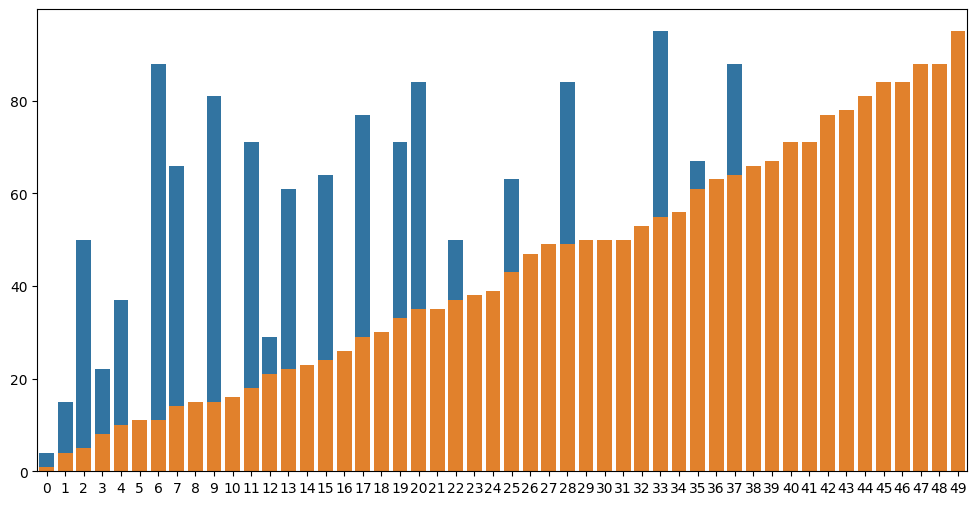

In [34]:
new_X()

def prepare_partition(X, f, l):
    # Pivot element
    pivot = X[f]
    p = f - 1
    for i in range(f, l + 1):
        if X[i] <= pivot:
            p += 1
            # Swap elements directly
            X[i], X[p] = X[p], X[i]
    # Place pivot in the correct position
    X[f], X[p] = X[p], X[f]
    return p

def quicksort(X, f, l):
    if f < l:
        part = prepare_partition(X, f, l)
        quicksort(X, f, part - 1)
        quicksort(X, part + 1, l)

quicksort(X, 0, len(X)-1)
sns.barplot(X)

### modified

<AxesSubplot:>

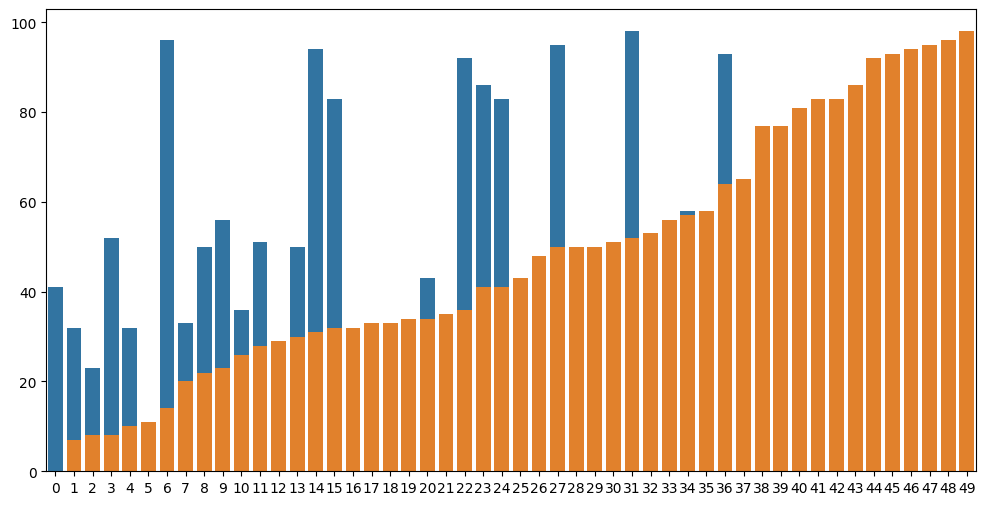

In [39]:
new_X()

def prepare_partition(X, f, l):
    # Choose a random pivot index and swap it to the front
    pivot_index = random.randint(f, l)
    X[f], X[pivot_index] = X[pivot_index], X[f]
    
    # Pivot element
    pivot = X[f]
    p = f - 1
    for i in range(f, l + 1):
        if X[i] <= pivot:
            p += 1
            # Swap elements directly
            X[i], X[p] = X[p], X[i]
    # Place pivot in the correct position
    X[f], X[p] = X[p], X[f]
    return p

def quicksort(X, f, l):
    if f < l:
        part = prepare_partition(X, f, l)
        quicksort(X, f, part - 1)
        quicksort(X, part + 1, l)

quicksort(X, 0, len(X)-1)
sns.barplot(X)